In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 10000)

from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

#### ML Process (Linear Regression)

#### 1. data load
#### 2. EDA - 결측치, 전처리, 시각화, insight, 통계...
#### 3. label(y)을 추출. => x_data/ y_data divide
#### 4. Train Data/ Test Data split
#### 5. Algorithm 가져온다 (import)
#### 6. Algorithm에 data를 주어서 algorithm을 학습시킨다. (fit)
#### 7. Algorithm이 학습된 후 model이 된다...
#### 8. Model은 예측을 할 수 있다. => 예측을 시킨다 (Test Data)
#### 9. Model을 평가 => model이 예측한 값과 실제값을 비교..

#### 1. data load

In [31]:
ML_model= pd.read_pickle('merge_콜론대쉬제거_210121.pki')
print('ML_model 데이타셋 크기 :',ML_model.shape)
ML_model.head(1)

ML_model 데이타셋 크기 : (1032749, 713)


,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6

In [3]:
ML_스터디카페_독서실 = ML_model[(ML_model.소분류업종=='스터디카페')|(ML_model.서비스업종코드명=='독서실')]
print('스터디카페_독서실 데이타셋 크기 :',ML_스터디카페_독서실.shape)
ML_스터디카페_독서실.head(1)

스터디카페_독서실 데이타셋 크기 : (2465, 713)


,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6

In [4]:
# 영업일수 int 로 바꾸기
ML_스터디카페_독서실.영업일수 = ML_스터디카페_독서실.영업일수.astype(str)
ML_스터디카페_독서실.영업일수 = ML_스터디카페_독서실.영업일수.apply(lambda x : x.split(' ')[0]).astype(int)
ML_스터디카페_독서실.영업일수.describe()

count     2465.000000
mean      1686.994320
std       1785.167003
min          0.000000
25%        457.000000
50%       1096.000000
75%       2191.000000
max      17289.000000
Name: 영업일수, dtype: float64

### 매출이 높고 임대시세가 낮으면 사업기간이 길 것이라는 가설 확인
* 사업 성공 기준에 대한 기준 필요
* 매출이 높고 임대시세가 낮으면 이익이 높아 사업은 안정적일 것으로 예측
* 이익 컬럼을 만들고 사업기간과 다시 비교

count      2465.000000
mean     114740.524138
std       27881.750202
min       52717.000000
25%       92973.000000
50%      114683.000000
75%      137898.000000
max      263113.000000
Name: 임대시세전체, dtype: float64

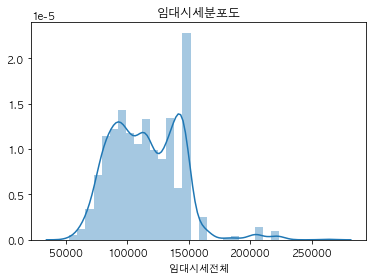

In [5]:
plt.title('임대시세분포도')
sns.distplot(ML_스터디카페_독서실.임대시세전체)
ML_스터디카페_독서실.임대시세전체.describe()

In [6]:
ML_스터디카페_독서실[['adres','임대시세전체','storNm']].sort_values(by='임대시세전체', ascending=False).head(20)

,adres,임대시세전체,storNm
868140,서울특별시 송파구 위례성대로2길 15 (방이동),263113.0,코코리빙텔
868139,서울특별시 송파구 오금로11길 63-5 (방이동),263113.0,참좋은고시텔
1026906,서울특별시 강남구 남부순환로 2936 (대치2동),221643.0,플러스독서실
974917,"서울특별시 강남구 도곡로 420, 지하1층 (대치동)",221643.0,잇츠스터디카페
974918,서울특별시 강남구 도곡로 434 (대치동),221643.0,꿈을이루는독서실
974919,"서울특별시 강남구 도곡로 434, 3층 (대치동,청은빌딩)",221643.0,꿈을이루는독서실
770149,"서울특별시 강남구 남부순환로395길 10, 2층 (대치동,국제상가)",221643.0,하우스터디대치2독서실
770144,"서울특별시 강남구 남부순환로 2917, 4층 (대치동,청실종합상가)",221643.0,엘리트독서실
770146,"서울특별시 강남구 남부순환로 2921, 307호 (대치동,남서울종합시장)",221643.0,찰리초이
770145,"서울특별시 강남구 남부순환로 2921 (대치동,남서울종합시장2층)",221643.0,스터디에비뉴


In [7]:
# storNm 을 보면 리빙텔, 레지던스, 하우스, 고시텔 등의 불필요 데이터가 보임
# => 제거

In [8]:
model_df = ML_스터디카페_독서실.copy()

In [9]:
model_df_ 

,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6

In [10]:
drop_name = ['리빙텔', '레지던스', '하우스', '고시텔']
model_df[model_df['storNm'].str.contains(drop_name[0])].index

Int64Index([ 52352,  54604,  68655, 107498, 111981, 118842, 203007, 209702,
            245451, 245452, 245453, 245454, 245455, 245477, 261598, 268484,
            273240, 370221, 408355, 408356, 421092, 422043, 438773, 461160,
            584748, 584757, 606825, 606826, 641014, 682956, 688447, 703735,
            740253, 740254, 740255, 756205, 774309, 826850, 843823, 843839,
            868140, 873166, 876850, 878032, 972619, 972620],
           dtype='int64')

In [11]:
drop_name = ['리빙텔', '레지던스', '하우스', '고시텔']
drop_idx = []
for i in drop_name:
    idx = model_df[model_df['storNm'].str.contains(i)].index
    for j in idx:
        if j not in drop_idx:
            drop_idx.append(j)
        else:
            pass
len(drop_idx)

260

In [12]:
model_df.storNm[drop_idx].unique()

array(['클린리빙텔', '클래식리빙텔', '푸르지오리빙텔', '마이홈리빙텔', '토마토리빙텔', '대방리빙텔',
       '골든벨리빙텔', '코아리빙텔', '에이플러스리빙텔고시원', '키움리빙텔', '영리빙텔', '우리리빙텔',
       '호호리빙텔', '마이홈리빙텔고시원', '오투리빙텔고시원', '코코리빙텔', '쉐르빌리빙텔', '소호리빙텔강남점',
       '로뎀원룸리빙텔', '드림리빙텔', '힐리빙텔', '세종리빙텔강남점', '이지리빙텔', '베스트리빙텔', '소호리빙텔',
       '풀리빙텔', '둥지리빙텔', '등촌역소호레지던스', '노블레지던스', '산호레지던스', '휴레지던스',
       '연신내레지던스플러스', '오렌지레지던스', '코코레지던스', '하이레지던스', '허브레지던스', '보보레지던스',
       '종로레지던스', '로블레지던스', '한울레지던스', '미니레지던스', 'H레지던스', '에이치레지던스',
       '더샵레지던스', '제이에스레지던스', '파인트리레지던스', '베스트레지던스', '보보레지던스선릉점',
       'W레지던스삼성병원점', '코코레지던스잠실점', '마루레지던스', '코코레지던스경희대점', '레지던스쉼표',
       '하우스터디목동센터독서실', '하우스터디목동센터모임공간', '코지하우스고시텔', '호하우스', '그린하우스홍대점',
       '해피하우스', '심플하우스', '바비하우스', '파인힐하우스', '코업스터디하우스독서실', '스토리하우스',
       '비버하우스서강대점', '허브하우스', '어반하우스', '하우스터디노량진센터독서실', '하우스터디노량진센터모임공간',
       '예지하우스', '스마트하우스', '이대하우스', '리베하우스', '하우스터디홍제센터독서실',
       '하우스터디홍제센터모임공간', '하우스터디상도센터독서실', '하우스터디상도센터모임공간', '해피하우스고시원',
       '아름하우스', '멀티하우스방배점', '명동파파하우스', 

In [13]:
print('이상치 제거 전 data shape',model_df.shape)
model_df.drop(index = drop_idx, inplace=True)
model_df = model_df.reset_index(drop=True)
print('이상치 제거 후 data shape',model_df.shape)

이상치 제거 전 data shape (2465, 713)
이상치 제거 후 data shape (2205, 713)


#### 분기매출, 임대시세, 영업일수 간의 상관관계 그래프로 확인하기

In [14]:
df = model_df[['adres','storNm','분기매출금액','임대시세전체','영업일수']].sort_values(by='분기매출금액', ascending=True)
df = df.reset_index(drop=True)
df['idx'] = range(len(model_df))
df = df[['분기매출금액','임대시세전체','영업일수']].sort_values(by='분기매출금액', ascending=True)
df.shape

(2205, 3)

In [15]:
# 비교를 위해 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['분기매출금액','임대시세전체','영업일수'])
df['idx'] = range(len(model_df))
df

,분기매출금액,임대시세전체,영업일수,idx
0,-0.103150,-0.690700,-0.850691,0
1,-0.103150,-0.690700,-0.063669,1
2,-0.102904,-0.889587,0.755801,2
3,-0.102619,-0.711934,-0.197865,3
4,-0.102619,-0.711934,0.002878,4
...,...,...,...,...
2200,1.798689,0.022735,-0.833642,2200
2201,2.133937,0.794079,-0.883690,2201
2202,2.133937,0.794079,-0.164316,2202
2203,32.810863,0.902783,-0.834192,2203


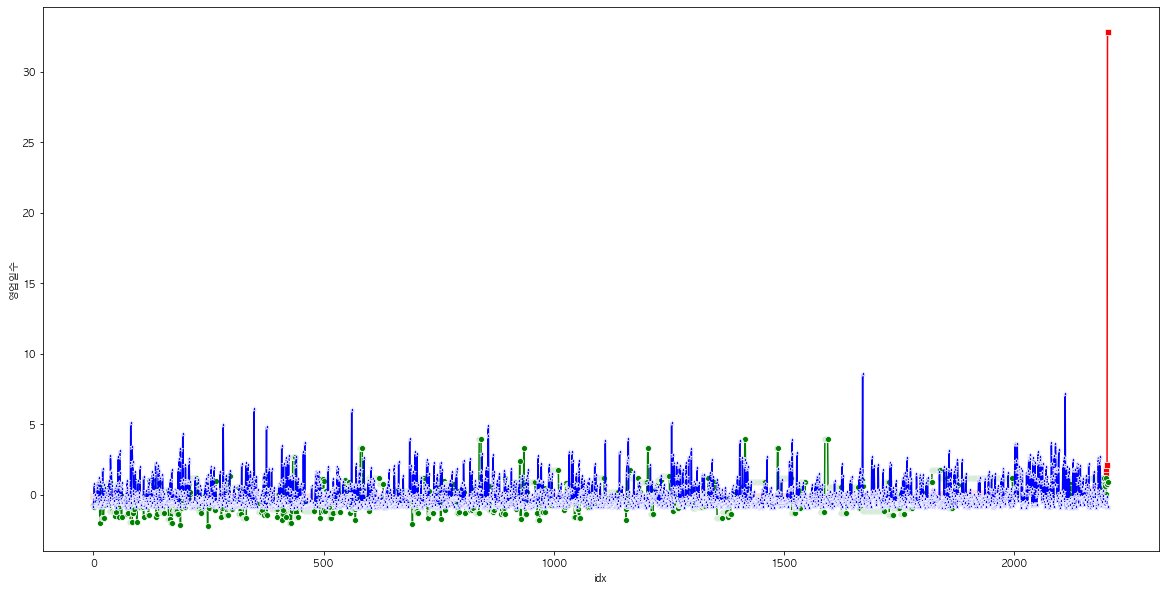

In [16]:
# data 이상치 때문에 제대로 볼 수 없다.
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='idx', y='분기매출금액',marker='s', color='r', data=df)
ax = sns.lineplot(x='idx', y='임대시세전체',marker='o', color='g', data=df)
ax = sns.lineplot(x='idx', y='영업일수',marker='*', color='b', data=df)
plt.show()

#### target 값 이상치 제거

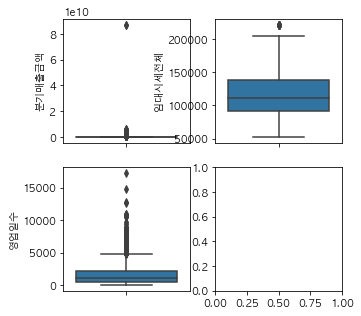

In [17]:
# boxplot 으로 데이터 이상치 확인
df_target = model_df[['분기매출금액','임대시세전체','영업일수']]
features = ['분기매출금액','임대시세전체','영업일수']

fig, axs = plt.subplots(figsize=(5,5) , ncols=2 , nrows=2)
for i , feature in enumerate(features):
    row = int(i/2)
    col = i%2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.boxplot(x=None, y=feature, data=df_target, ax=axs[row][col])

In [18]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분기매출금액  2205 non-null   float64
 1   임대시세전체  2205 non-null   float64
 2   영업일수    2205 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 51.8 KB


In [19]:
# 이상치 제거
outlier_index = []
for i in range(len(features)):
        weight = 1.5
        fraud = df_target.iloc[:,i]
        quantile_25 = np.percentile(fraud.values, 25)
        quantile_75 = np.percentile(fraud.values, 75)
        # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight
        # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
        temp_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
        for j in temp_index:
            if j not in outlier_index:
                outlier_index.append(j)
            else:
                pass

print(len(outlier_index))

507


In [20]:
# 타겟 이상치 제거
print('이상치 제거 전 data shape',model_df.shape)
model_df.drop(index=outlier_index, inplace=True)
print('이상치 제거 후 data shape',model_df.shape)

이상치 제거 전 data shape (2205, 713)
이상치 제거 후 data shape (1698, 713)


In [21]:
model_df

,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6

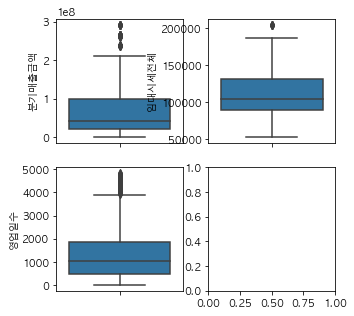

In [22]:
# boxplot 으로 데이터 이상치 확인
df_target = model_df[['분기매출금액','임대시세전체','영업일수']]
features = ['분기매출금액','임대시세전체','영업일수']

fig, axs = plt.subplots(figsize=(5,5) , ncols=2 , nrows=2)
for i , feature in enumerate(features):
    row = int(i/2)
    col = i%2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.boxplot(x=None, y=feature, data=df_target, ax=axs[row][col])

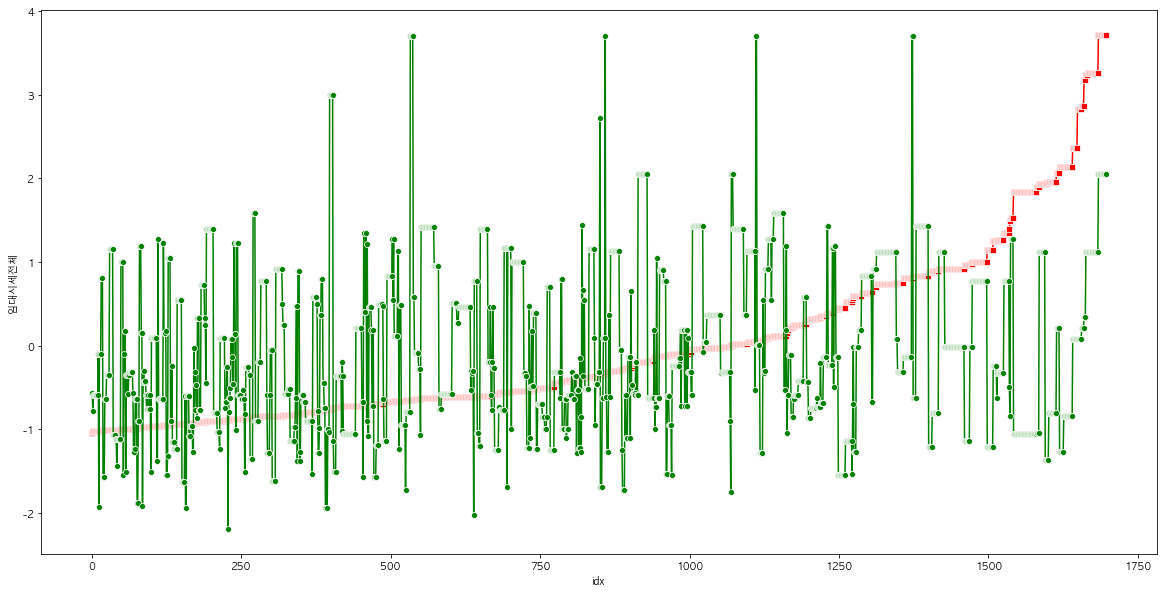

In [24]:
# 분기매출 데이터 추출
df = model_df[['adres','storNm','분기매출금액','임대시세전체','영업일수']].sort_values(by='분기매출금액', ascending=True)
df = df.reset_index(drop=True)
df['idx'] = range(len(model_df))
df = df[['분기매출금액','임대시세전체','영업일수']].sort_values(by='분기매출금액', ascending=True)
df.shape

# 비교를 위해 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['분기매출금액','임대시세전체','영업일수'])
df['idx'] = range(len(model_df))

# data 그래프
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='idx', y='분기매출금액',marker='s', color='r', data=df)
ax = sns.lineplot(x='idx', y='임대시세전체',marker='o', color='g', data=df)
# ax = sns.lineplot(x='idx', y='영업일수',marker='*', color='b', data=df)
plt.show()

#### 결론 : 매출, 임대시세, 사업기간 상관관계를 찾을 수 없다.
#### => 이익 target 만들기
* 판매원가(임대료 + 인건비 등) = 총 매출의 50% 가정
* 임대시세에 따라 원가에 최대 10% 가중치 적용
* 대치동 스터디카페 매출 1억 / 원가 5천만 + 가중치 10% 1천만 => 이익 4천만

In [25]:
# model_df['영업이익'] = model_df.분기매출금액 - (model_df.분기매출금액*0.5+model_df.임대시세전체/model_df.임대시세전체.max()/10)
df1 = model_df.분기매출금액
df2 = df1*0.5 # 기본원가
df3 = model_df.임대시세전체/model_df.임대시세전체.max()/10 # 가중치, 최고 10%
영업이익 = df1 - df2 - df1*df3
영업이익

0       9.439723e+06
1       6.792893e+07
2       1.439829e+07
3       1.439829e+07
4       4.096183e+07
            ...     
2200    3.040411e+07
2201    3.040411e+07
2202    3.040411e+07
2203    3.040411e+07
2204    3.040411e+07
Length: 1698, dtype: float64

In [26]:
for i in range(len(model_df.columns)):
    print(i,model_df.columns[i])

0 adres
1 도로명
2 상권코드명
3 서비스업종코드명
4 소분류업종
5 storNm
6 totalCount
7 coordx
8 coordy
9 x
10 y
11 opbizYm
12 clsbizYm
13 영업일계산기준일
14 상권구분코드
15 상권구분코드명
16 상권코드
17 서비스업종코드
18 분기매출금액
19 당월매출건수
20 엑스좌표값
21 와이좌표값
22 행정동코드명
23 임대시세1층
24 임대시세1층외
25 소득분위
26 점포당분기매출
27 임대시세전체
28 영업일수
29 가구수
30 소득분위점수
31 점포수
32 주중매출비율
33 주말매출비율
34 월요일매출비율
35 화요일매출비율
36 수요일매출비율
37 목요일매출비율
38 금요일매출비율
39 토요일매출비율
40 일요일매출비율
41 시간대0006매출비율
42 시간대0611매출비율
43 시간대1114매출비율
44 시간대1417매출비율
45 시간대1721매출비율
46 시간대2124매출비율
47 남성매출비율
48 여성매출비율
49 연령대10매출비율
50 연령대20매출비율
51 연령대30매출비율
52 연령대40매출비율
53 연령대50매출비율
54 연령대60이상매출비율
55 주중매출금액
56 주말매출금액
57 월요일매출금액
58 화요일매출금액
59 수요일매출금액
60 목요일매출금액
61 금요일매출금액
62 토요일매출금액
63 일요일매출금액
64 시간대0006매출금액
65 시간대0611매출금액
66 시간대1114매출금액
67 시간대1417매출금액
68 시간대1721매출금액
69 시간대2124매출금액
70 남성매출금액
71 여성매출금액
72 연령대10매출금액
73 연령대20매출금액
74 연령대30매출금액
75 연령대40매출금액
76 연령대50매출금액
77 연령대60이상매출금액
78 주중매출건수
79 주말매출건수
80 월요일매출건수
81 화요일매출건수
82 수요일매출건수
83 목요일매출건수
84 금요일매출건수
85 토요일매출건수
86 일요일매출건수
87 시간대건수06매출건수
88 시간대건수11매출건수
89 시

In [27]:
model_df.insert(26,"영업이익",영업이익,True)
model_df.head(1)

,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,영업이익,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요

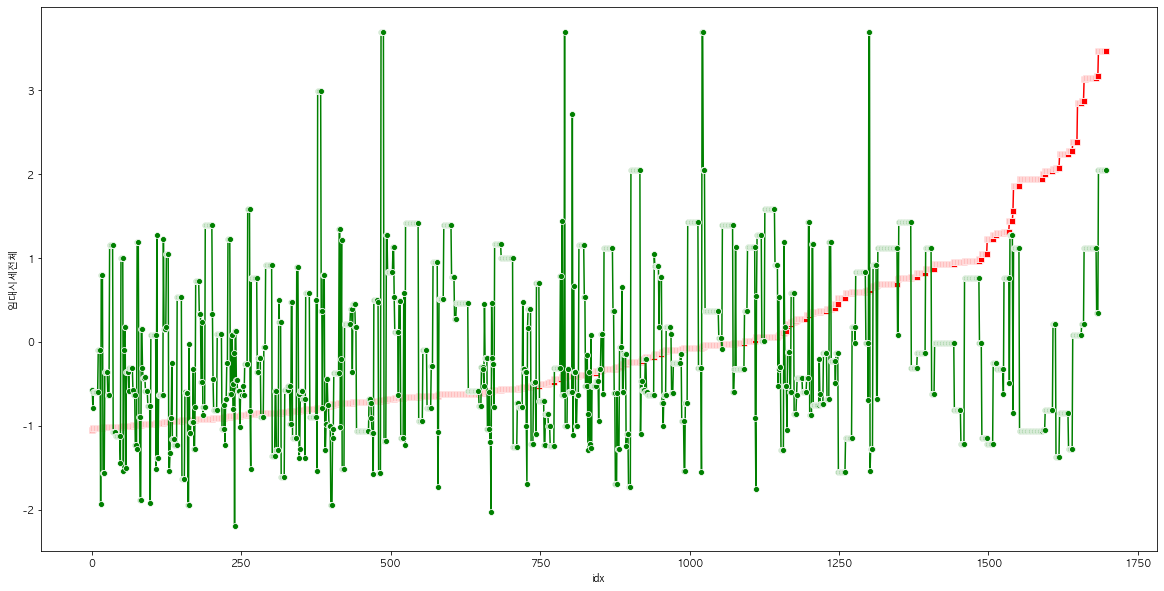

In [34]:
# 분기매출 데이터 추출
df = model_df[['영업이익','영업일수','임대시세전체']].sort_values(by='영업이익', ascending=True)
df = df.reset_index(drop=True)
df['idx'] = range(len(model_df))
df = df[['영업이익','영업일수','임대시세전체']].sort_values(by='영업이익', ascending=True)
df.shape

# 비교를 위해 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['영업이익','영업일수','임대시세전체'])
df['idx'] = range(len(model_df))

# data 그래프
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='idx', y='영업이익',marker='s', color='r', data=df)
ax = sns.lineplot(x='idx', y='임대시세전체',marker='o', color='g', data=df)
# ax = sns.lineplot(x='idx', y='영업일수',marker='*', color='b', data=df)
plt.show()

#### 영업이익과 영업일수와의 상관관계도 찾을 수 없다
#### target 을 영업이익 단독으로 정하겠다.

In [35]:
model_df = model_df.iloc[:,26:].copy()
model_df.head(1)

,영업이익,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6유동인구수,남성연령대40화요일시간대1유동인구수,남성연령대40화요일시간대2유동인구수,남성연령대40화요일시간대3유동인구수,남성연령대40화요일시간대4유동인구수,남성연령대40화요일시간대5유동인구수,남성연령대40화요일시간대6유동인구수,남성연령대40수요일시간대1유동인구수,남성연령대40수요일시간대2유동인구수,남성연

In [36]:
model_df.drop(columns=['점포당분기매출','임대시세전체','영업일수'], inplace=True)

In [37]:
model_df.head(1)

,영업이익,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6유동인구수,남성연령대40화요일시간대1유동인구수,남성연령대40화요일시간대2유동인구수,남성연령대40화요일시간대3유동인구수,남성연령대40화요일시간대4유동인구수,남성연령대40화요일시간대5유동인구수,남성연령대40화요일시간대6유동인구수,남성연령대40수요일시간대1유동인구수,남성연령대40수요일시간대2유동인구수,남성연령대40수요일시간대3유동인구수,남성연

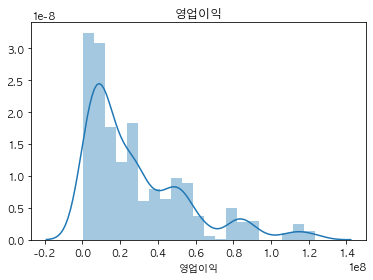

In [38]:
# target 이 정규분포를 이루고 있지 않다.
plt.title('영업이익')
sns.distplot(model_df['영업이익'])

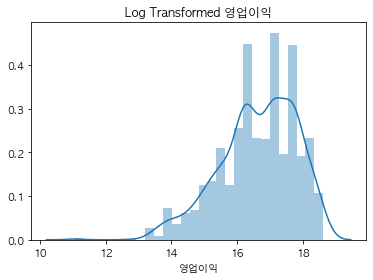

In [39]:
# 타겟값 log 화
plt.title('Log Transformed 영업이익')
log_분기매출 = np.log1p(model_df['영업이익'])
sns.distplot(log_분기매출)

#### 3. LinearRegression 분석
* random_state : 132
* MSE : 0.124 , RMSE : 0.352
* Variance score : 0.907

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y = log_분기매출
x = model_df.drop(columns = '영업이익', axis=1)

for i in range(300):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)

    lr = LinearRegression()
    lr.fit(x_train ,y_train )
    y_preds = lr.predict(x_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    if r2_score(y_test, y_preds) > 0.9:
        print('random_state :',i)
        print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
        print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

random_state : 5
MSE : 0.134 , RMSE : 0.366
Variance score : 0.906
random_state : 43
MSE : 0.128 , RMSE : 0.357
Variance score : 0.904
random_state : 94
MSE : 0.132 , RMSE : 0.364
Variance score : 0.904
random_state : 132
MSE : 0.124 , RMSE : 0.352
Variance score : 0.907
random_state : 227
MSE : 0.141 , RMSE : 0.375
Variance score : 0.901


In [41]:
# 랜덤스테이트 결정
random_state = 132

##### (1) scaling 후 분석
* MSE : 0.278 , RMSE : 0.527
* Variance score : 0.792

In [42]:
from sklearn.preprocessing import StandardScaler

y = log_분기매출
x = model_df.drop(columns = '영업이익', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

lr = LinearRegression()
lr.fit(scaled_x_train ,y_train )
y_preds = lr.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.278 , RMSE : 0.527
Variance score : 0.792


In [43]:
model_copy = model_df.copy()

### 규제 및 오차 최소화 작업

In [44]:
def get_rmse(model):
    pred = model.predict(scaled_x_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

##### (1) 릿지, 랏쏘 규제

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = np.log1p(model_copy['영업이익'])
X_features = model_copy.drop(columns = '영업이익', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(scaled_x_train, y_train)
y_preds = lr.predict(scaled_x_test)

ridge_reg = Ridge()
ridge_reg.fit(scaled_x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(scaled_x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


preds1 = lr_reg.predict(scaled_x_test)
print('lr_reg_r2_score',r2_score(y_test, preds1))
preds2 = ridge_reg.predict(scaled_x_test)
print('ridge_reg_r2_score',r2_score(y_test, preds2))
preds3 = lasso_reg.predict(scaled_x_test)
print('lasso_reg_r2_score',r2_score(y_test, preds3))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

LinearRegression RMSE: 0.527
Ridge RMSE: 0.345
Lasso RMSE: 1.156
lr_reg_r2_score 0.7916672980523474
ridge_reg_r2_score 0.9109305667298767
lasso_reg_r2_score -0.0022231651021631382
Variance score : 0.792


In [46]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(ridge_reg.coef_, 1), index=x.columns )
coeff.sort_values(ascending=False)

여성연령대50월요일시간대3유동인구수      1.0
여성연령대50월요일시간대4유동인구수      0.8
여성연령대60이상토요일시간대3유동인구수    0.7
점포수                      0.6
남성연령대30일요일시간대6유동인구수      0.5
                        ... 
여성연령대10금요일시간대1유동인구수     -0.6
남성연령대40토요일시간대4유동인구수     -0.6
비아파트가구수                 -0.7
총가구수                    -0.7
여성연령대10수요일시간대4유동인구수     -0.7
Length: 684, dtype: float64

In [47]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=x.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

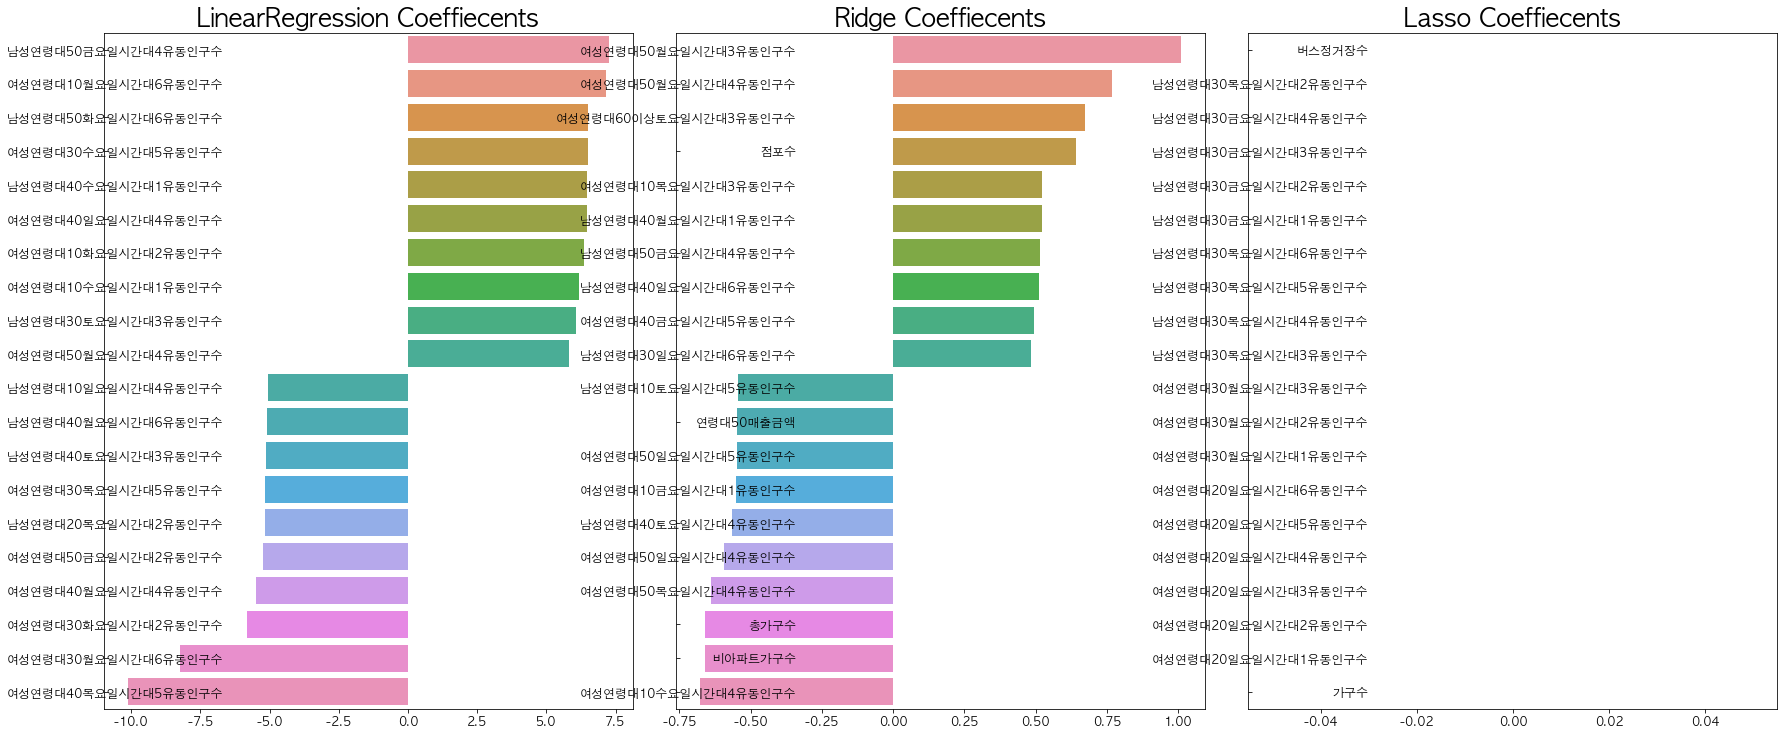

In [48]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [49]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, scaled_x_train, y_train,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.713 0.889 2.106 0.773 0.964]
LinearRegression CV 평균 RMSE 값: 1.089

Ridge CV RMSE 값 리스트: [0.34  0.462 0.389 0.396 0.424]
Ridge CV 평균 RMSE 값: 0.402

Lasso CV RMSE 값 리스트: [1.109 1.12  1.23  1.218 1.155]
Lasso CV 평균 RMSE 값: 1.166


* 하이퍼 파라미터 튜닝

In [50]:

from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(scaled_x_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)


Ridge 5 CV 시 최적 평균 RMSE 값: 0.4042, 최적 alpha:{'alpha': 1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.4311, 최적 alpha:{'alpha': 0.001}


LinearRegression RMSE: 0.527
Ridge RMSE: 0.345
Lasso RMSE: 0.427
lr_reg_r2_score 0.7916672980523474
ridge_reg_r2_score 0.9109305667298767
lasso_reg_r2_score 0.8630071950038438


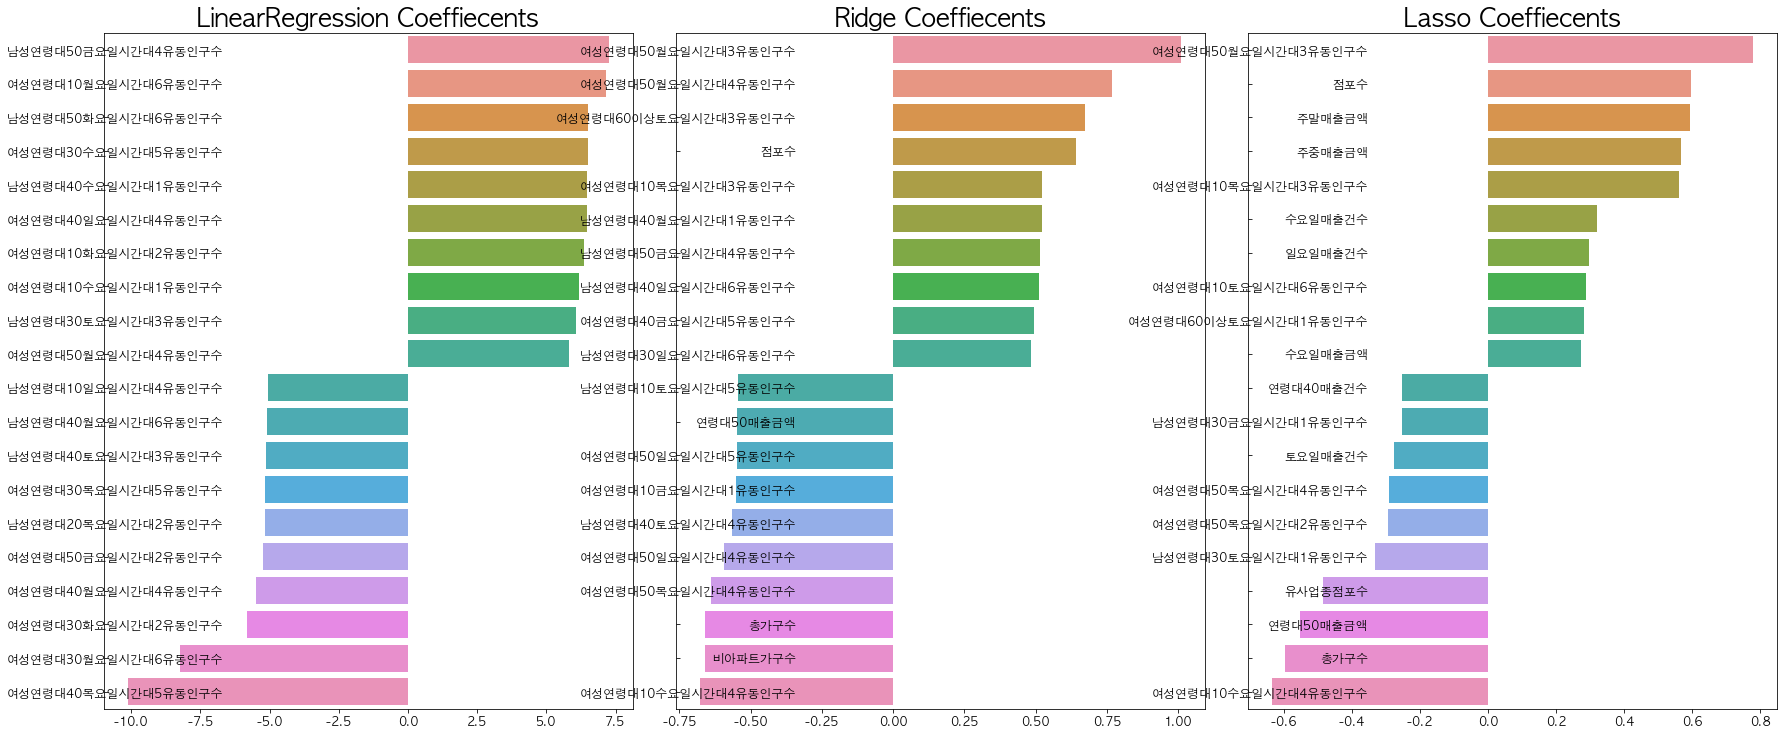

In [51]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(scaled_x_train, y_train)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(scaled_x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(scaled_x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

preds1 = lr_reg.predict(scaled_x_test)
print('lr_reg_r2_score',r2_score(y_test, preds1))
preds2 = ridge_reg.predict(scaled_x_test)
print('ridge_reg_r2_score',r2_score(y_test, preds2))
preds3 = lasso_reg.predict(scaled_x_test)
print('lasso_reg_r2_score',r2_score(y_test, preds3))

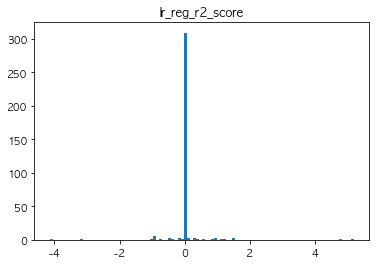

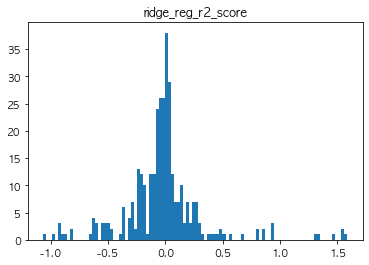

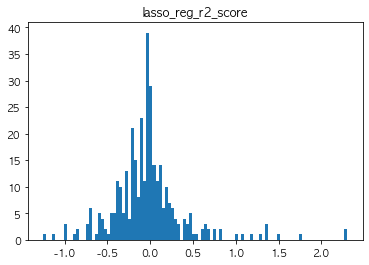

In [52]:
plt.title('lr_reg_r2_score')
plt.hist((preds1 - y_test).values, bins=100)
plt.show()
plt.title('ridge_reg_r2_score')
plt.hist((preds2 - y_test).values, bins=100)
plt.show()
plt.title('lasso_reg_r2_score')
plt.hist((preds3 - y_test).values, bins=100)
plt.show()

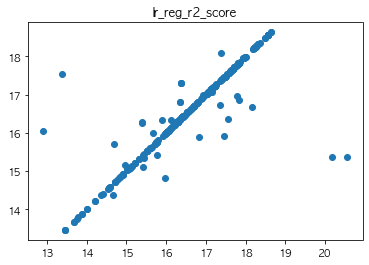

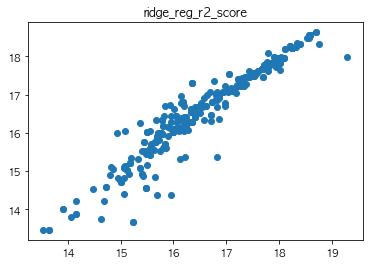

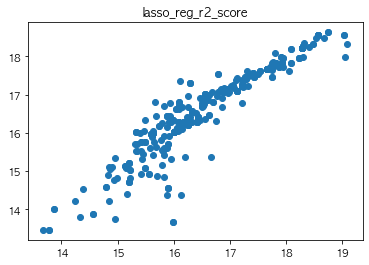

In [53]:
plt.title('lr_reg_r2_score')
plt.scatter(preds1,y_test)
plt.show()
plt.title('ridge_reg_r2_score')
plt.scatter(preds2,y_test)
plt.show()
plt.title('lasso_reg_r2_score')
plt.scatter(preds3,y_test)
plt.show()

### 회귀 트리 학습/예측/평가 

##### (1) 랜덤포레스트

In [54]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = get_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1189, 최적 alpha:{'n_estimators': 1000}


In [55]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1339, 최적 alpha:{'n_estimators': 1000}


xgb_pred_rmse r2_score : 0.9997610702614729
lgbm_pred_rmse r2_score : 0.9983703535426778


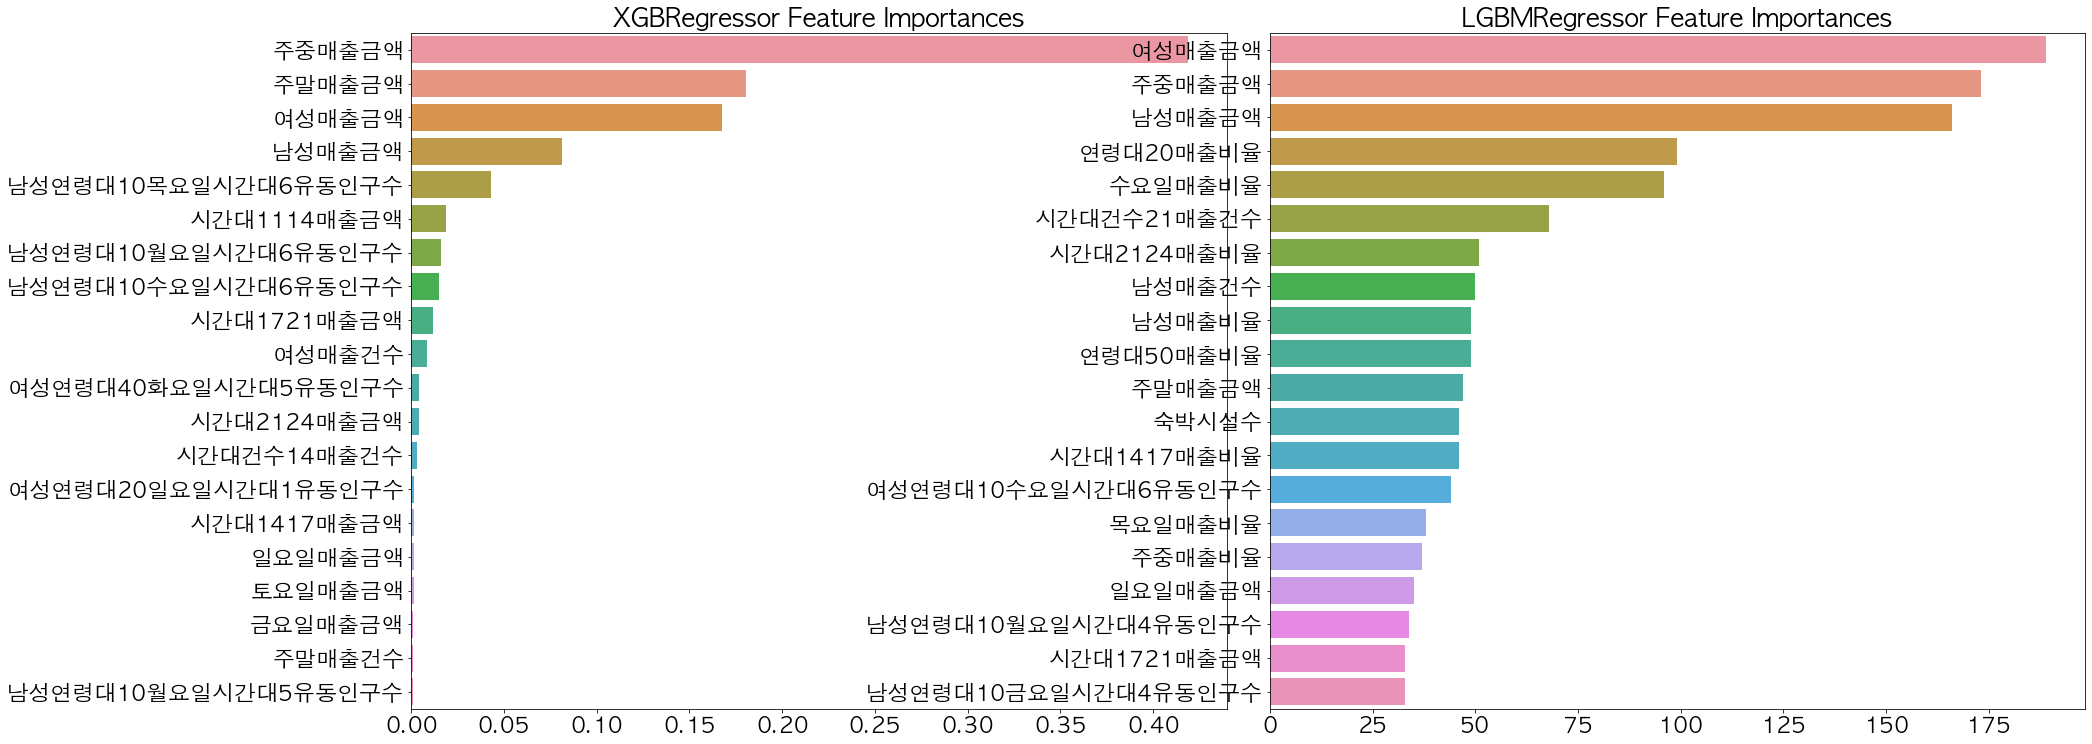

In [57]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

xgb_reg.fit(scaled_x_train, y_train)
lgbm_reg.fit(scaled_x_train, y_train)
xgb_pred = xgb_reg.predict(scaled_x_test)
lgbm_pred = lgbm_reg.predict(scaled_x_test)
        
print('xgb_pred_rmse r2_score :',r2_score(y_test, xgb_pred))
print('lgbm_pred_rmse r2_score :',r2_score(y_test, lgbm_pred))

### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [236]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(scaled_x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(scaled_x_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(scaled_x_test)
lasso_pred = lasso_reg.predict(scaled_x_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

print('최종 혼합 모델',r2_score(y_test, pred))

최종 혼합 모델의 RMSE: 0.3884599493447017
Ridge 모델의 RMSE: 0.34470734597573777
Lasso 모델의 RMSE: 0.42749897053072317
최종 혼합 모델 0.8868850233763308


In [237]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(scaled_x_train, y_train)
lgbm_reg.fit(scaled_x_train, y_train)
xgb_pred = xgb_reg.predict(scaled_x_test)
lgbm_pred = lgbm_reg.predict(scaled_x_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

print('최종혼합모델',r2_score(y_test, pred))

최종 혼합 모델의 RMSE: 0.02999317513455544
XGBM 모델의 RMSE: 0.01785341491169578
LGBM 모델의 RMSE: 0.04662650816506348
최종혼합모델 0.999325669973137


#### 최종 모델 선택 : ridge_reg_r2_score 0.9109305667298767
* LinearRegression RMSE: 0.527
* Ridge RMSE: 0.345
* Lasso RMSE: 0.427
* lr_reg_r2_score 0.7916672980523474
* ridge_reg_r2_score 0.9109305667298767
* lasso_reg_r2_score 0.8630071950038438

LinearRegression RMSE: 0.527
Ridge RMSE: 0.345
Lasso RMSE: 0.427
lr_reg_r2_score 0.7916672980523474
ridge_reg_r2_score 0.9109305667298767
lasso_reg_r2_score 0.8630071950038438


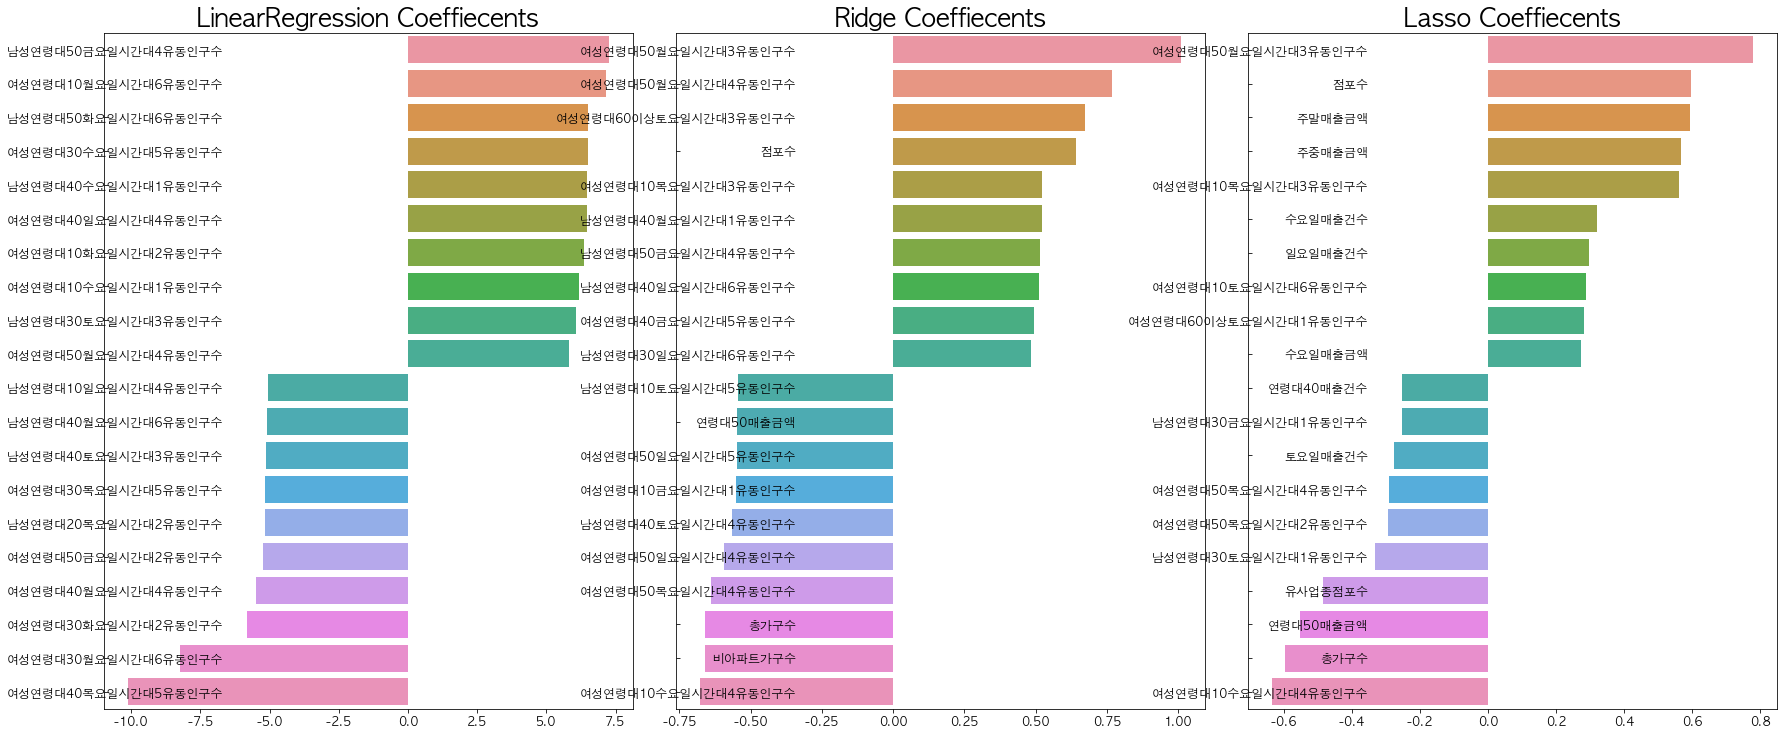

In [245]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = np.log1p(model_copy['영업이익']) # y_target log화
X_features = model_copy.drop(columns = '영업이익', axis=1) # X_features scaling

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=random_state)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(scaled_x_train, y_train)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(scaled_x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(scaled_x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

preds1 = lr_reg.predict(scaled_x_test)
print('lr_reg_r2_score',r2_score(y_test, preds1))
preds2 = ridge_reg.predict(scaled_x_test)
print('ridge_reg_r2_score',r2_score(y_test, preds2))
preds3 = lasso_reg.predict(scaled_x_test)
print('lasso_reg_r2_score',r2_score(y_test, preds3))

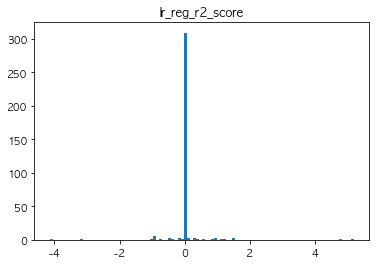

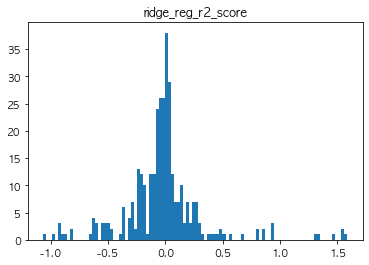

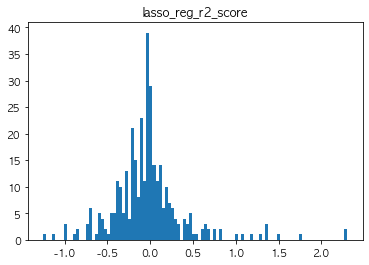

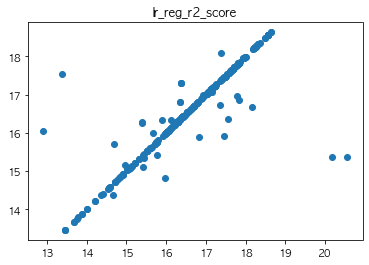

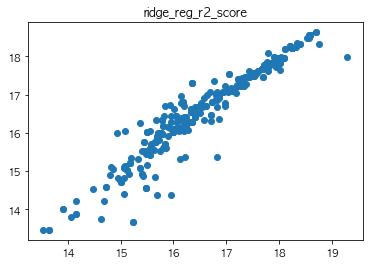

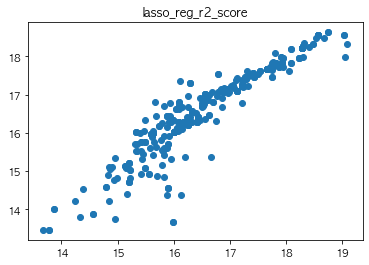

In [246]:
plt.title('lr_reg_r2_score')
plt.hist((preds1 - y_test).values, bins=100)
plt.show()
plt.title('ridge_reg_r2_score')
plt.hist((preds2 - y_test).values, bins=100)
plt.show()
plt.title('lasso_reg_r2_score')
plt.hist((preds3 - y_test).values, bins=100)
plt.show()

plt.title('lr_reg_r2_score')
plt.scatter(preds1,y_test)
plt.show()
plt.title('ridge_reg_r2_score')
plt.scatter(preds2,y_test)
plt.show()
plt.title('lasso_reg_r2_score')
plt.scatter(preds3,y_test)
plt.show()

# 모델 저장

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
# from sklearn.externals import joblib

studycafe_model = pickle.dumps(ridge_reg)

In [250]:
clf_from_pickle = pickle.loads(studycafe_model)

In [251]:
clf_from_pickle.predict(scaled_x_test) # 사용할 때 x data scailng 필요

array([16.04976373, 16.62176841, 16.0755207 , 16.009807  , 13.91419476,
       16.82505987, 14.95211396, 16.12599421, 16.14369577, 16.63881248,
       15.42332458, 15.08775025, 17.79443058, 15.64440938, 17.21300062,
       13.91419476, 16.3979249 , 16.58059077, 16.172666  , 15.8290525 ,
       15.99922698, 15.68780026, 17.76484231, 15.06272045, 16.2441907 ,
       15.17591564, 16.242141  , 16.4451657 , 16.76301035, 16.26814709,
       17.69840716, 15.77098769, 17.52475674, 15.08837125, 18.24016555,
       18.24016555, 15.4766966 , 17.2572213 , 15.4984117 , 17.67207085,
       17.29432304, 15.4984117 , 15.68296619, 15.80177751, 17.72414779,
       17.9067364 , 16.51489851, 17.2572213 , 18.40389886, 18.20960406,
       18.11465204, 17.57335736, 15.7856558 , 16.21583803, 18.58197907,
       16.86523627, 18.24016555, 17.52475674, 16.96973186, 17.00146677,
       16.04976373, 16.2441907 , 17.88508693, 14.81655364, 17.67207085,
       15.99922698, 15.64336708, 16.98657302, 16.80771511, 18.01

In [252]:
test_df = pd.read_pickle('merge_콜론대쉬제거_210121.pki')
test_df.head(1)

,adres,도로명,상권코드명,서비스업종코드명,소분류업종,storNm,totalCount,coordx,coordy,x,y,opbizYm,clsbizYm,영업일계산기준일,상권구분코드,상권구분코드명,상권코드,서비스업종코드,분기매출금액,당월매출건수,엑스좌표값,와이좌표값,행정동코드명,임대시세1층,임대시세1층외,소득분위,점포당분기매출,임대시세전체,영업일수,가구수,소득분위점수,점포수,주중매출비율,주말매출비율,월요일매출비율,화요일매출비율,수요일매출비율,목요일매출비율,금요일매출비율,토요일매출비율,일요일매출비율,시간대0006매출비율,시간대0611매출비율,시간대1114매출비율,시간대1417매출비율,시간대1721매출비율,시간대2124매출비율,남성매출비율,여성매출비율,연령대10매출비율,연령대20매출비율,연령대30매출비율,연령대40매출비율,연령대50매출비율,연령대60이상매출비율,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,시간대0006매출금액,시간대0611매출금액,시간대1114매출금액,시간대1417매출금액,시간대1721매출금액,시간대2124매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,주중매출건수,주말매출건수,월요일매출건수,화요일매출건수,수요일매출건수,목요일매출건수,금요일매출건수,토요일매출건수,일요일매출건수,시간대건수06매출건수,시간대건수11매출건수,시간대건수14매출건수,시간대건수17매출건수,시간대건수21매출건수,시간대건수24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,연령대10직장인구수,연령대20직장인구수,연령대30직장인구수,연령대40직장인구수,연령대50직장인구수,연령대60이상직장인구수,남성연령대10직장인구수,남성연령대20직장인구수,남성연령대30직장인구수,남성연령대40직장인구수,남성연령대50직장인구수,남성연령대60이상직장인구수,여성연령대10직장인구수,여성연령대20직장인구수,여성연령대30직장인구수,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,총유동인구수,남성유동인구수,여성유동인구수,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,시간대5유동인구수,시간대6유동인구수,월요일유동인구수,화요일유동인구수,수요일유동인구수,목요일유동인구수,금요일유동인구수,토요일유동인구수,일요일유동인구수,남성연령대10월요일시간대1유동인구수,남성연령대10월요일시간대2유동인구수,남성연령대10월요일시간대3유동인구수,남성연령대10월요일시간대4유동인구수,남성연령대10월요일시간대5유동인구수,남성연령대10월요일시간대6유동인구수,남성연령대10화요일시간대1유동인구수,남성연령대10화요일시간대2유동인구수,남성연령대10화요일시간대3유동인구수,남성연령대10화요일시간대4유동인구수,남성연령대10화요일시간대5유동인구수,남성연령대10화요일시간대6유동인구수,남성연령대10수요일시간대1유동인구수,남성연령대10수요일시간대2유동인구수,남성연령대10수요일시간대3유동인구수,남성연령대10수요일시간대4유동인구수,남성연령대10수요일시간대5유동인구수,남성연령대10수요일시간대6유동인구수,남성연령대10목요일시간대1유동인구수,남성연령대10목요일시간대2유동인구수,남성연령대10목요일시간대3유동인구수,남성연령대10목요일시간대4유동인구수,남성연령대10목요일시간대5유동인구수,남성연령대10목요일시간대6유동인구수,남성연령대10금요일시간대1유동인구수,남성연령대10금요일시간대2유동인구수,남성연령대10금요일시간대3유동인구수,남성연령대10금요일시간대4유동인구수,남성연령대10금요일시간대5유동인구수,남성연령대10금요일시간대6유동인구수,남성연령대10토요일시간대1유동인구수,남성연령대10토요일시간대2유동인구수,남성연령대10토요일시간대3유동인구수,남성연령대10토요일시간대4유동인구수,남성연령대10토요일시간대5유동인구수,남성연령대10토요일시간대6유동인구수,남성연령대10일요일시간대1유동인구수,남성연령대10일요일시간대2유동인구수,남성연령대10일요일시간대3유동인구수,남성연령대10일요일시간대4유동인구수,남성연령대10일요일시간대5유동인구수,남성연령대10일요일시간대6유동인구수,남성연령대20월요일시간대1유동인구수,남성연령대20월요일시간대2유동인구수,남성연령대20월요일시간대3유동인구수,남성연령대20월요일시간대4유동인구수,남성연령대20월요일시간대5유동인구수,남성연령대20월요일시간대6유동인구수,남성연령대20화요일시간대1유동인구수,남성연령대20화요일시간대2유동인구수,남성연령대20화요일시간대3유동인구수,남성연령대20화요일시간대4유동인구수,남성연령대20화요일시간대5유동인구수,남성연령대20화요일시간대6유동인구수,남성연령대20수요일시간대1유동인구수,남성연령대20수요일시간대2유동인구수,남성연령대20수요일시간대3유동인구수,남성연령대20수요일시간대4유동인구수,남성연령대20수요일시간대5유동인구수,남성연령대20수요일시간대6유동인구수,남성연령대20목요일시간대1유동인구수,남성연령대20목요일시간대2유동인구수,남성연령대20목요일시간대3유동인구수,남성연령대20목요일시간대4유동인구수,남성연령대20목요일시간대5유동인구수,남성연령대20목요일시간대6유동인구수,남성연령대20금요일시간대1유동인구수,남성연령대20금요일시간대2유동인구수,남성연령대20금요일시간대3유동인구수,남성연령대20금요일시간대4유동인구수,남성연령대20금요일시간대5유동인구수,남성연령대20금요일시간대6유동인구수,남성연령대20토요일시간대1유동인구수,남성연령대20토요일시간대2유동인구수,남성연령대20토요일시간대3유동인구수,남성연령대20토요일시간대4유동인구수,남성연령대20토요일시간대5유동인구수,남성연령대20토요일시간대6유동인구수,남성연령대20일요일시간대1유동인구수,남성연령대20일요일시간대2유동인구수,남성연령대20일요일시간대3유동인구수,남성연령대20일요일시간대4유동인구수,남성연령대20일요일시간대5유동인구수,남성연령대20일요일시간대6유동인구수,남성연령대30월요일시간대1유동인구수,남성연령대30월요일시간대2유동인구수,남성연령대30월요일시간대3유동인구수,남성연령대30월요일시간대4유동인구수,남성연령대30월요일시간대5유동인구수,남성연령대30월요일시간대6유동인구수,남성연령대30화요일시간대1유동인구수,남성연령대30화요일시간대2유동인구수,남성연령대30화요일시간대3유동인구수,남성연령대30화요일시간대4유동인구수,남성연령대30화요일시간대5유동인구수,남성연령대30화요일시간대6유동인구수,남성연령대30수요일시간대1유동인구수,남성연령대30수요일시간대2유동인구수,남성연령대30수요일시간대3유동인구수,남성연령대30수요일시간대4유동인구수,남성연령대30수요일시간대5유동인구수,남성연령대30수요일시간대6유동인구수,남성연령대30목요일시간대1유동인구수,남성연령대30목요일시간대2유동인구수,남성연령대30목요일시간대3유동인구수,남성연령대30목요일시간대4유동인구수,남성연령대30목요일시간대5유동인구수,남성연령대30목요일시간대6유동인구수,남성연령대30금요일시간대1유동인구수,남성연령대30금요일시간대2유동인구수,남성연령대30금요일시간대3유동인구수,남성연령대30금요일시간대4유동인구수,남성연령대30금요일시간대5유동인구수,남성연령대30금요일시간대6유동인구수,남성연령대30토요일시간대1유동인구수,남성연령대30토요일시간대2유동인구수,남성연령대30토요일시간대3유동인구수,남성연령대30토요일시간대4유동인구수,남성연령대30토요일시간대5유동인구수,남성연령대30토요일시간대6유동인구수,남성연령대30일요일시간대1유동인구수,남성연령대30일요일시간대2유동인구수,남성연령대30일요일시간대3유동인구수,남성연령대30일요일시간대4유동인구수,남성연령대30일요일시간대5유동인구수,남성연령대30일요일시간대6유동인구수,남성연령대40월요일시간대1유동인구수,남성연령대40월요일시간대2유동인구수,남성연령대40월요일시간대3유동인구수,남성연령대40월요일시간대4유동인구수,남성연령대40월요일시간대5유동인구수,남성연령대40월요일시간대6

In [253]:
test_df.소분류업종.unique()

array(['자동차부품', '자동차수리', '반찬가게', '일반의류', '청과상', '한식음식점', '기사식당', '삼겹살',
       '전', '냉면', '국수', '곱창', '죽', '감자탕', '갈비', '오리', '슈퍼마켓', '애완동물',
       '애견', '제과점', '화장품', '신발', '분식전문점', '떡볶이', '호프-간이주점', '피부관리실', '서적',
       '미용실', '의약품', '사진관', '커피-음료', '가구', '중식음식점', '핸드폰', '육류판매', '주유소',
       '스포츠 강습', '예술학원', '유아의류', 'PC방', '치킨', '치킨전문점', '일반의원', '당구장',
       '한의원', '노래방', '컴퓨터및주변장치판매', '패스트푸드점', '피자', '화초', '일반교습학원', '치과의원',
       '편의점', '시계및귀금속', '운동/경기용품', '인테리어', '조명용품', '문구', '의료기기', '철물점',
       '세탁소', '수산물판매', '비빔밥', '족발', '설렁탕', '삼계탕', '장어', '스포츠클럽', '참치',
       '안경', '네일숍', '여관', '보쌈', '아구', '굴', '미곡판매', '일식음식점', '자동차미용',
       '가전제품', '양식음식점', '섬유제품', '독서실', '낙지', '백반', '추어탕', '도시락', '부대찌개',
       '샤브샤브', '골프연습장', '쌈밥', '여행사', '외국어학원', '가전제품수리', '건축물청소', '전자상거래업',
       '가방', '돌솥', '완구', '초밥', '예술품', '생선', '게장', '순두부', '스터디카페',
       '자전거 및 기타운송장비', '한복점', '통신기기수리', '부동산중개업', '복전문', '중국집', '변호사사무소',
       '법무사사무소', '보드게임', '악기', '볼링장', '세무사사무소', '고시원', '회계사사무소',

In [259]:
test_df = test_df[test_df.소분류업종=='골프연습장'].copy()
x = test_df.iloc[:,29:]

In [260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x)

In [268]:
predict_ = clf_from_pickle.predict(scaled_x_train) # 사용할 때 x data scailng 필요

In [270]:
test_df['영업이익'] = np.exp(predict_)
test_df[['영업이익','adres',]].sort_values(by='영업이익', ascending=False)

,영업이익,adres
862647,1.252089e+13,"서울특별시 중랑구 봉화산로56길 106, 5층 (신내동)"
862645,1.252089e+13,서울특별시 중랑구 신내1동 413-8번지
862646,1.252089e+13,"서울특별시 중랑구 용마산로129나길 6, B동4-5층 (신내동)"
862648,1.252089e+13,서울특별시 중랑구 신내동 413-1번지
862649,1.252089e+13,"서울특별시 중랑구 신내동 413-1번지 대동빌딩 4,5층"
...,...,...
711914,5.992387e+05,"서울특별시 동대문구 왕산로 239, 5,6호 지하-3 (청량리동)"
711915,5.992387e+05,"서울특별시 동대문구 왕산로 211-1, 5층 (청량리동)"
711916,5.992387e+05,"서울특별시 동대문구 왕산로 211-1, 5층 (청량리동)"
711917,5.992387e+05,"서울특별시 동대문구 약령시로 158, 지하 (청량리동,동신빌딩)"
